In [3]:
# Import dependencies
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Reflect Tables into SQLAlchemy ORM

In [7]:
engine = create_engine("sqlite:///Data/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base=automap_base()
Base.prepare(engine,reflect=True)

In [10]:
# All of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Hawaii_Station=Base.classes.station
Measurement_Class=Base.classes.measurement

In [13]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

<function matplotlib.pyplot.show(*args, **kw)>

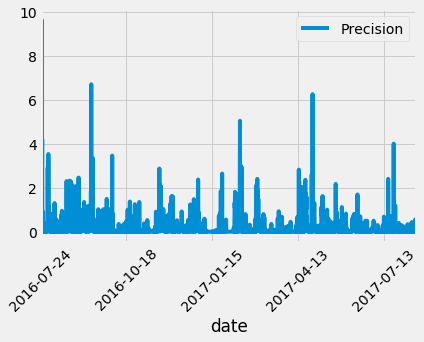

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
Year_before=dt.date(2017,7,24)-dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
Result=session.query(Measurement_Class.date,Measurement_Class.prcp).filter(Measurement_Class.date>=Year_before).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(Result,columns=['date','Precision']).sort_values("date",ascending=True).dropna()
df.set_index(df['date'],inplace=True)
# Sort the dataframe by date
df.sort_index()
# Plot the data
df.plot(rot=45)
plt.show

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precision
count,2192.000000
mean,0.197071
std,0.557220
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,9.640000


In [27]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Hawaii_Station.station)).all()

[(9)]

In [37]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_results = session.query(Measurement_Class.station, func.count(Measurement_Class.station)).group_by(Measurement_Class.station).\
    order_by(func.count(Measurement_Class.station).desc()).all()
station_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement_Class.tobs), func.max(Measurement_Class.tobs), func.avg(Measurement_Class.tobs)).\
    filter(Measurement_Class.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

In [41]:
# Highest number of temperature observations
High_temp=session.query(Measurement_Class.tobs).filter(Measurement_Class.station == "USC00519281").filter(Measurement_Class.date>=Year_before).all()

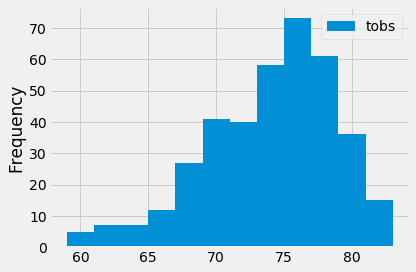

In [43]:
tobs_df=pd.DataFrame(High_temp,columns=['tobs'])
tobs_df.plot.hist(bins=12)
plt.tight_layout()

## Bonus Challenge Assignment

In [46]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement_Class.tobs), func.avg(Measurement_Class.tobs), func.max(Measurement_Class.tobs)).\
        filter(Measurement_Class.date >= start_date).filter(Measurement_Class.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [49]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_temps=calc_temps('2012-02-28', '2012-03-05')
trip_temps

[(62.0, 69.57142857142857, 74.0)]

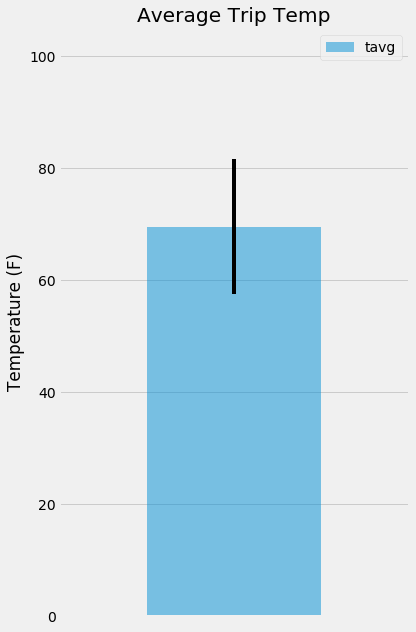

In [52]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
mintemp=trip_temps[0][0]
maxtemp=trip_temps[0][1]
avgtemp=trip_temps[0][2]
errormax=maxtemp-avgtemp
errormin=avgtemp-mintemp
error_bar=np.array([[errormin],[errormax]])

temps_df=pd.DataFrame(trip_temps, columns = ["tmin","tavg","tmax"])
temps_df.plot.bar(y='tavg',yerr=np.array([[errormin], [errormax]]),\
                       title='Average Trip Temp', alpha = 0.5, figsize = (6,9)).get_xaxis().set_visible(False)
plt.ylim(0,105)
plt.ylabel('Temperature (F)')
plt.tight_layout()


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
mintemp=


In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
